In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from scipy import stats
import scipy as sp
import datetime as dt
import community
from collections import Counter

from utilities import softmax

plt.rc('axes', axisbelow=True)
%matplotlib inline

# Protein networks

from [**Resilience and evolvability of protein-protein interaction networks**. by Brennan Klein, Ludvig Holmér, Keith M. Smith, Mackenzie M. Johnson, Anshuman Swain, Laura Stolp, Ashley I. Teufel, and April S. Kleppe. (2020)]().

In this work, we study the resilience and prospective resilience of three ribosomal protein networks: *S. cerevisiae*, *E. coli*, and *H. sapiens*. Each ribosomal protein of a given species is represented by a node in the network. The links between nodes were then established wherever there was evidence of protein-protein interactions in that species, in this case based on data from the SNAP database. We extracted the ribosomal proteins from the network data in Zitnik et al. (2019) and constructed individual ribosomal protein subnetworks based on data from the KEGG database.

Below, we plot these networks.

## Protein networks, degree distributions, and gene expression distributions

In [2]:
G_yeast = nx.read_graphml('../data/G_sce.graphml')
G_ecoli = nx.read_graphml('../data/G_eco.graphml')
G_human = nx.read_graphml('../data/G_hsa.graphml')

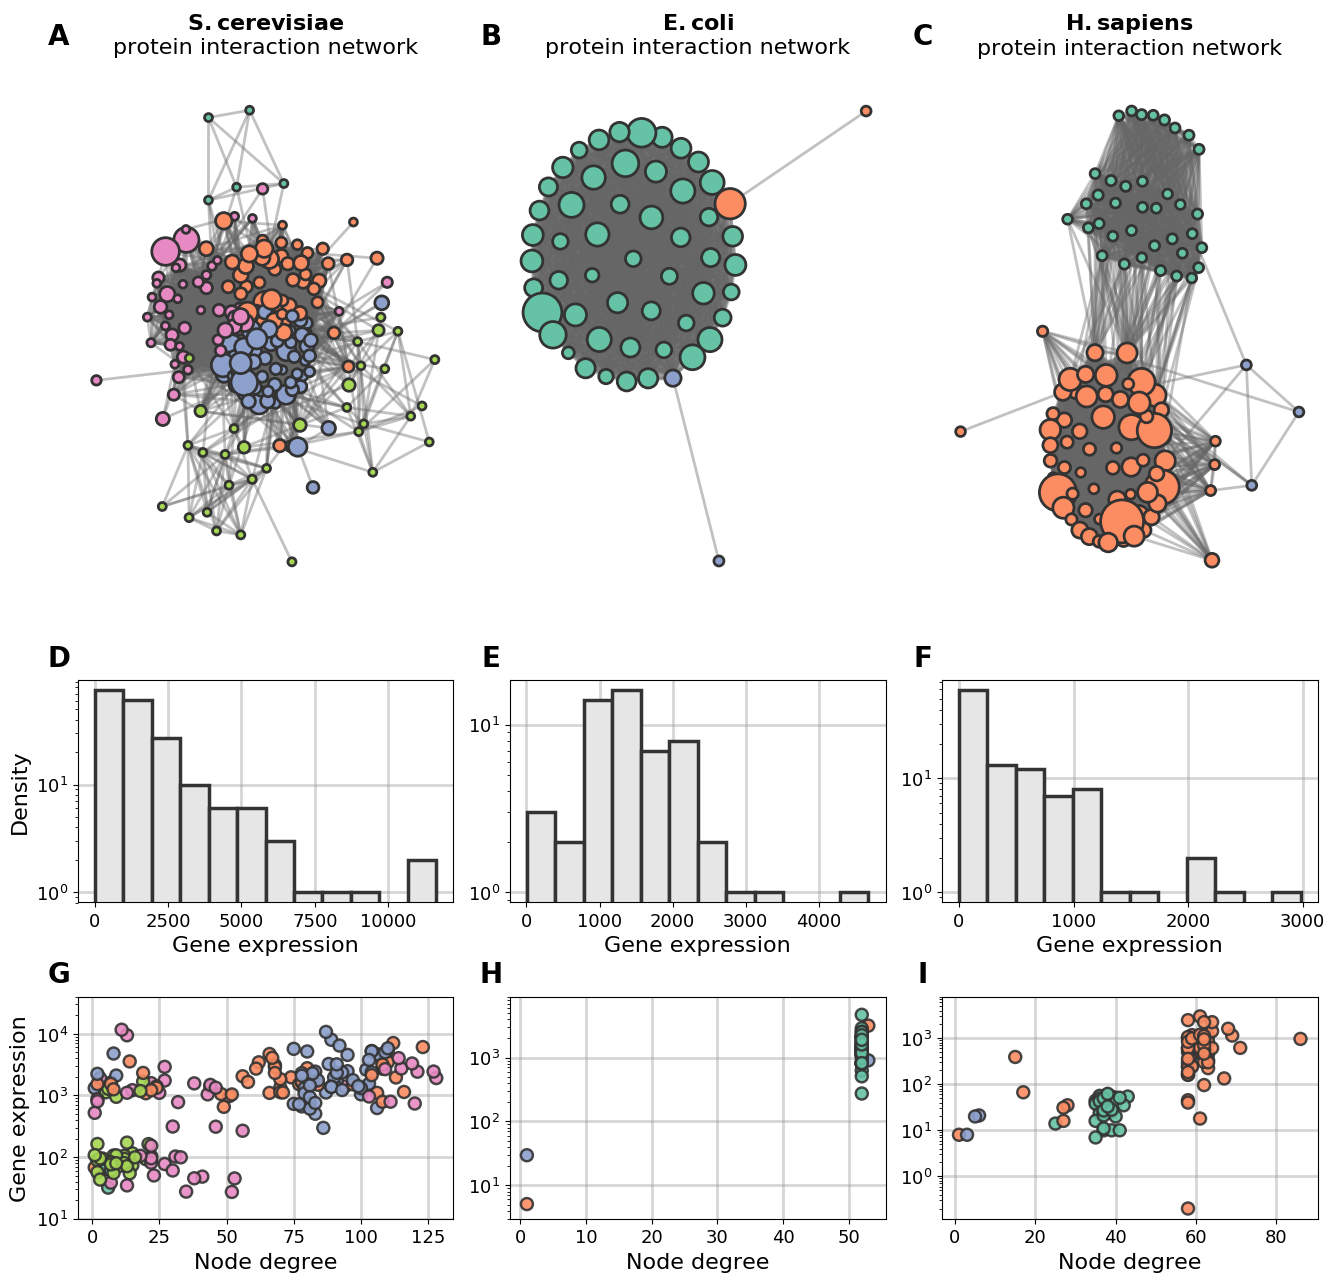

In [3]:
fig, ax = plt.subplots(3, 3, figsize=(16,15), dpi=100,
                       gridspec_kw={'height_ratios':[2.25,1,1]})
plt.subplots_adjust(hspace=0.3, wspace=0.15)

# titles
title_yeast = r"$\bf{S. cerevisiae}$"+"\nprotein interaction network"
title_ecoli = r"$\bf{E. coli}$"+"\nprotein interaction network"
title_human = r"$\bf{H. sapiens}$"+"\nprotein interaction network"

# edgecolors and linewidths
mec = '#333333'
eec = '#666666' 
mlw = 2.0
elw = 2.0

# colormap
cmap1 = plt.cm.Set2
cmap2 = plt.cm.Set2
cmap3 = plt.cm.Set2

# color nodes based on community
partition_yeast = community.best_partition(G_yeast)
partition_ecoli = community.best_partition(G_ecoli)
partition_human = community.best_partition(G_human)
cols_yeast = cmap1(np.unique(list(partition_yeast.values())))
cols_ecoli = cmap2(np.unique(list(partition_ecoli.values())))
cols_human = cmap3(np.unique(list(partition_human.values())))
node_colors_yeast = [cols_yeast[com] for com in partition_yeast.values()]
node_colors_ecoli = [cols_ecoli[com] for com in partition_ecoli.values()]
node_colors_human = [cols_human[com] for com in partition_human.values()]

# node sizes
gene_ex_yeast = list(nx.get_node_attributes(G_yeast, 'gene_expression').values())
gene_ex_ecoli = list(nx.get_node_attributes(G_ecoli, 'gene_expression').values())
gene_ex_human = list(nx.get_node_attributes(G_human, 'gene_expression').values())
ns_yeast = softmax(0.7*np.log2(1000+np.array(gene_ex_yeast)))*16000
ns_ecoli = softmax(1.1*np.log2(1000+np.array(gene_ex_ecoli)))*12000
ns_human = softmax(1.5*np.log2(1000+np.array(gene_ex_human)))*13000

# degree sequences
deg_yeast = list(dict(G_yeast.degree()).values())
deg_ecoli = list(dict(G_ecoli.degree()).values())
deg_human = list(dict(G_human.degree()).values())

# network layouts
pos_yeast = nx.kamada_kawai_layout(G_yeast)
pos_ecoli = nx.kamada_kawai_layout(G_ecoli)
pos_human = nx.kamada_kawai_layout(G_human)

# draw networks
nx.draw_networkx_nodes(G_yeast, pos_yeast, node_color=node_colors_yeast,
           node_size=ns_yeast, edgecolors=mec, linewidths=mlw, ax=ax[(0,0)])
nx.draw_networkx_nodes(G_ecoli, pos_ecoli, node_color=node_colors_ecoli,
           node_size=ns_ecoli, edgecolors=mec, linewidths=mlw, ax=ax[(0,1)])
nx.draw_networkx_nodes(G_human, pos_human, node_color=node_colors_human,
           node_size=ns_human, edgecolors=mec, linewidths=mlw, ax=ax[(0,2)])
nx.draw_networkx_edges(G_yeast, pos_yeast, edge_color=eec,
                       width=elw, alpha=0.4, ax=ax[(0,0)])
nx.draw_networkx_edges(G_ecoli, pos_ecoli, edge_color=eec,
                       width=elw, alpha=0.4, ax=ax[(0,1)])
nx.draw_networkx_edges(G_human, pos_human, edge_color=eec,
                       width=elw, alpha=0.4, ax=ax[(0,2)])

# plot data
ax[(1,0)].hist(gene_ex_yeast, bins=12, edgecolor='.2', color='.9', linewidth=2.5)
ax[(1,1)].hist(gene_ex_ecoli, bins=12, edgecolor='.2', color='.9', linewidth=2.5)
ax[(1,2)].hist(gene_ex_human, bins=12, edgecolor='.2', color='.9', linewidth=2.5)
ax[(2,0)].scatter(deg_yeast, gene_ex_yeast, c=node_colors_yeast,
                  s=75, linewidths=1.75, edgecolors='.2', alpha=0.9)
ax[(2,1)].scatter(deg_ecoli, gene_ex_ecoli, c=node_colors_ecoli,
                  s=75, linewidths=1.75, edgecolors='.2', alpha=0.9)
ax[(2,2)].scatter(deg_human, gene_ex_human, c=node_colors_human,
                  s=75, linewidths=1.75, edgecolors='.2', alpha=0.9)

# nuance range
ax[(2,0)].set_ylim(1e1,4e4)
ax[(2,1)].set_ylim(3e0,9e3)
ax[(2,2)].set_ylim(1.2e-1,8e3)

# set titles
ax[(0,0)].set_title(title_yeast, fontsize=16, y=1.05)
ax[(0,1)].set_title(title_ecoli, fontsize=16, y=1.05)
ax[(0,2)].set_title(title_human, fontsize=16, y=1.05)

alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
for ai,a in enumerate(fig.axes):
    a.text(-0.05, 1.1, alphabet[ai], fontsize=20, horizontalalignment='center',
           verticalalignment='center', transform=a.transAxes, fontweight='bold')

    if ai==3:
        a.set_ylabel('Density', fontsize=16)
    if ai==6:
        a.set_ylabel('Gene expression', fontsize=16)

    if ai > 2:
        a.set_yscale('log')
        a.grid(linewidth=2, color='#999999', alpha=0.4)
        a.tick_params(axis='both', which='both', labelsize=13,
                      labelbottom=True, bottom=True, labelleft=True, left=True)
    
        if ai >= 6:
            a.set_xlabel('Node degree', fontsize=16)
        else:
            a.set_xlabel('Gene expression', fontsize=16)
    else:
        a.set_axis_off()

# plt.savefig('../figs/pngs/ribosome_networks_with_gex_deg_data.png', dpi=425, bbox_inches='tight')
# plt.savefig('../figs/pdfs/ribosome_networks_with_gex_deg_data.pdf', dpi=425, bbox_inches='tight')
plt.show()

________________

## Visualizing different node attachment mechanisms
Switching back to simple random networks for this example, but only for visual intuition of the three node addition mechanisms we used in this study (and an extra "inverse-degree-based attachment" mechanism that we added for additional intuition).

In [4]:
from utilities import get_nodesizes

In [ ]:
N = 60
G = nx.barabasi_albert_graph(N, 3)
edges = list(G.edges())
for eij in edges:
    if np.random.rand()<0.2:
        G.remove_edge(eij[0],eij[1])

In [ ]:
m = 4

nc = 'w'
ec = '.2'
ns_init = 15
num_newnodes = 10
new_nc = plt.cm.OrRd_r(np.linspace(0.0,0.85,num_newnodes))

degs = np.array(list(dict(G.degree()).values()))
pos = nx.kamada_kawai_layout(G)

xcoords = list(list(zip(*list(pos.values())))[0])
ycoords = list(list(zip(*list(pos.values())))[1])
xmin = min(xcoords)
xmax = max(xcoords)
xdiff = xmax-xmin
ymin = min(ycoords)
ymax = max(ycoords)
ydiff = ymax-ymin

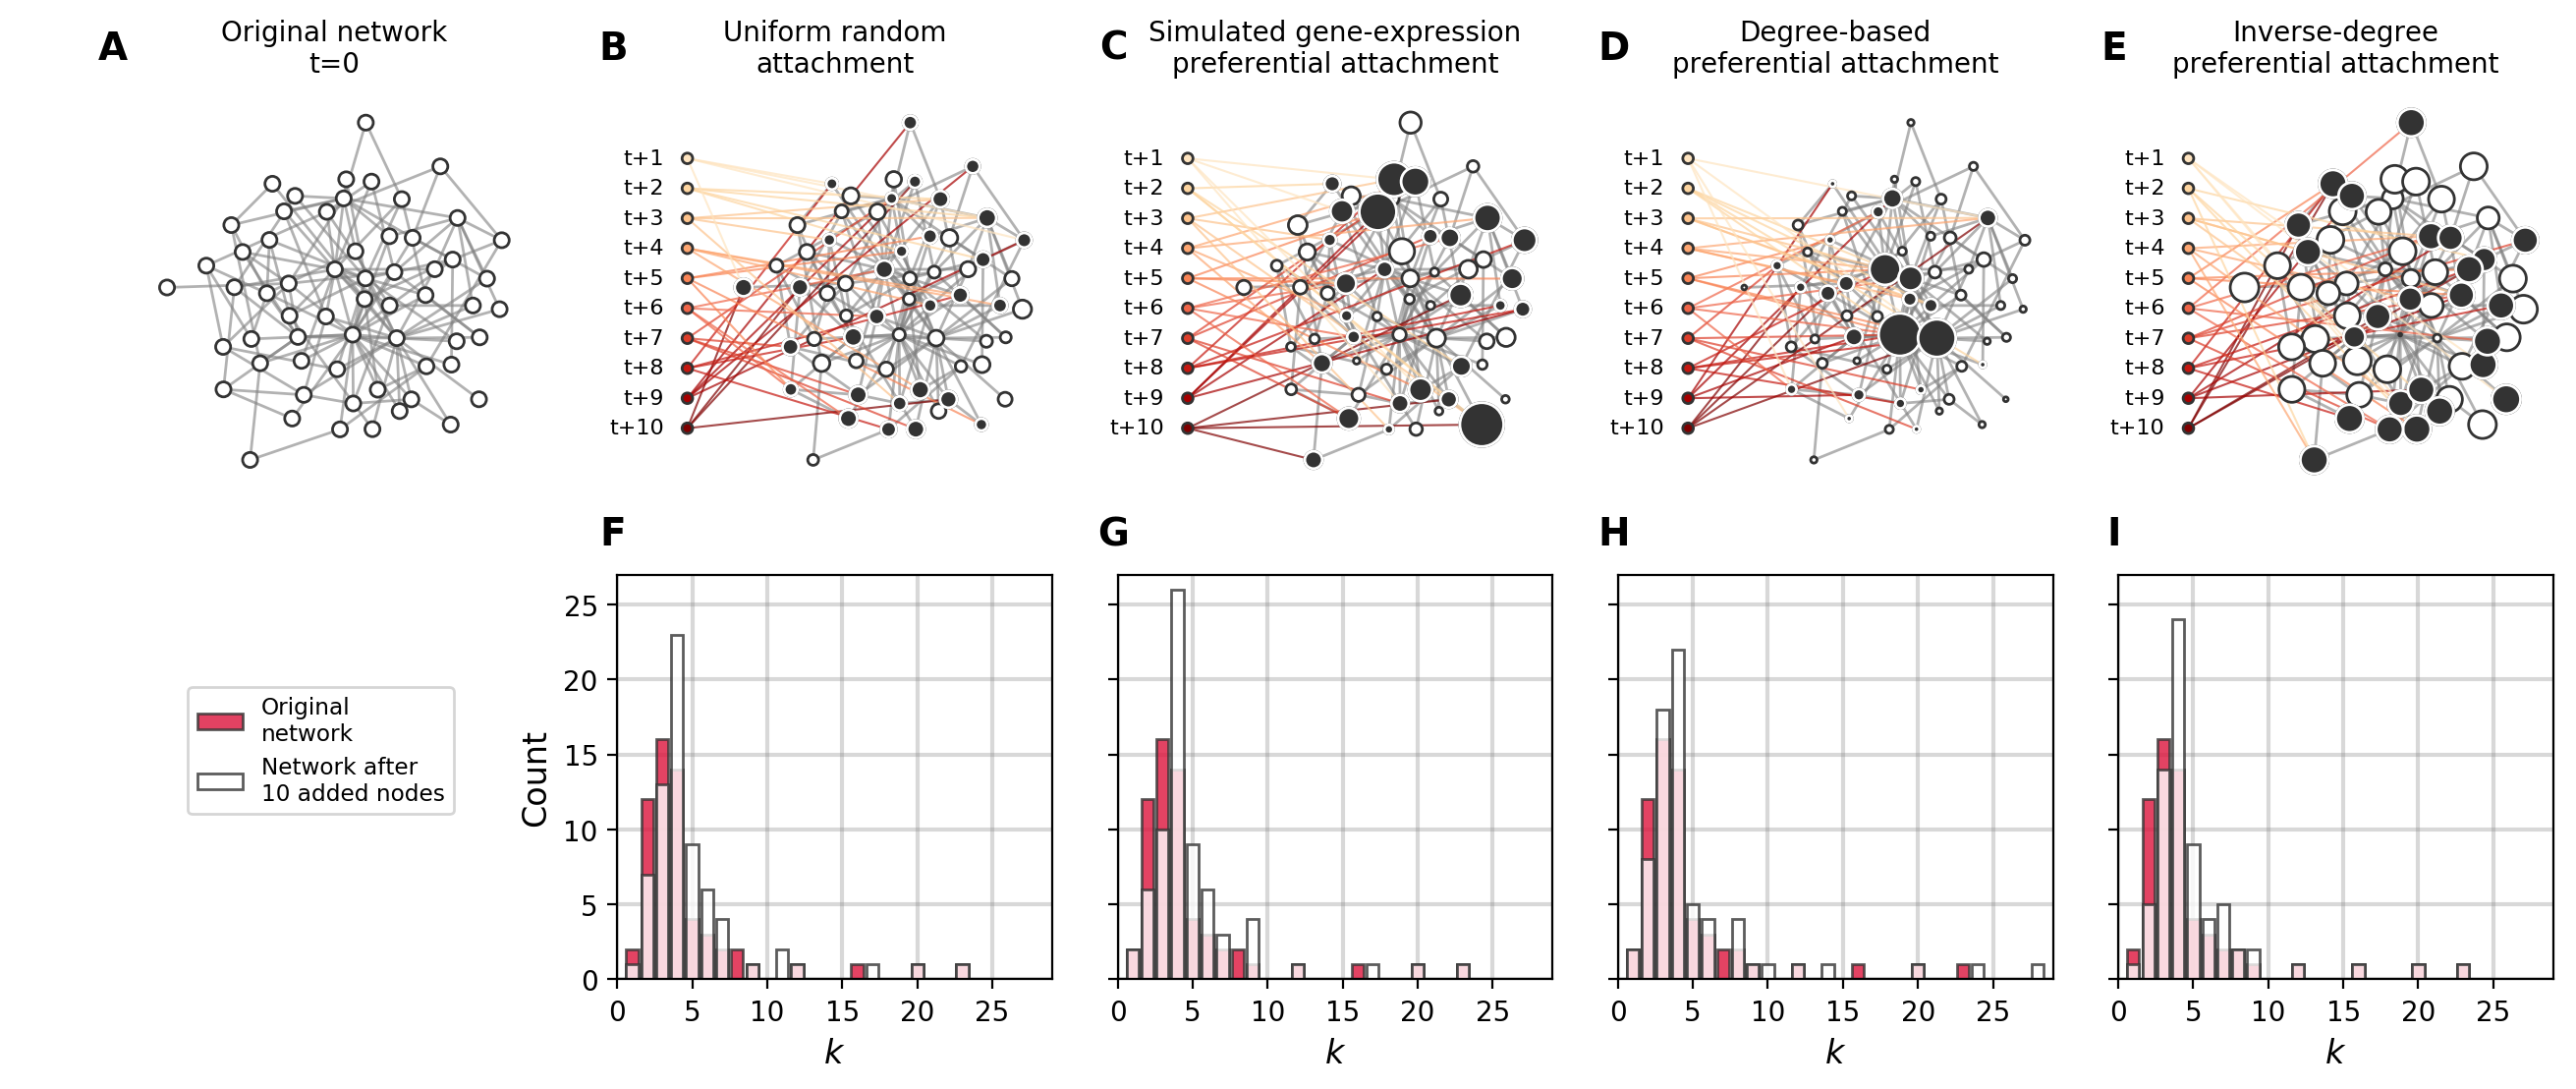

In [ ]:
max_ds = []
max_cs = []

attachments = ['none','random','gene-expression','degree','inverse-degree']

fig, ax = plt.subplots(2, 5, figsize=(16,6), dpi=200)
plt.subplots_adjust(hspace=0.2, wspace=0.15)

for i, attach_type in enumerate(attachments):
    
    pos = nx.kamada_kawai_layout(G)
    ns = get_nodesizes(G, attach_type)

    nx.draw_networkx_nodes(G, pos, node_size=ns, node_color=nc, edgecolors=ec, ax=ax[(0,i)])
    nx.draw_networkx_edges(G, pos, node_size=ns, edge_color='.5',
                           ax=ax[(0,i)], alpha=0.6)
    ax[(0,i)].set_ylim(ymin-0.1*ydiff,ymax+0.1*ydiff)
    ax[(0,i)].set_xlim(xmin-0.15*xdiff,xmax+0.15*xdiff)

    if i > 0:
        H = G.copy()
        ax[(0,i)].set_ylim(ymin-0.1*ydiff,ymax+0.1*ydiff)
        ax[(0,i)].set_xlim(xmin-0.45*xdiff,xmax+0.1*xdiff)

        new_nodes = list(range(N, N+10))
        elist = []
        nlist = []
        H.add_nodes_from(new_nodes)
        new_ec = []
        for n_i, node in enumerate(new_nodes):
            node_js = np.random.choice(G.nodes(), size=m, replace=False, p=ns/sum(ns))
            for node_j in node_js:
                H.add_edge(node, node_j)
                nlist.append(node_j)
                elist.append((node, node_j))
                new_ec.append(new_nc[n_i])

        nlist = list(set(nlist))
        pos_new = dict(zip(new_nodes,list(zip([xmin-0.2*xdiff]*num_newnodes,
                                              np.linspace(ymin*0.8, ymax*0.8, 10)))))
        for pos_n, pos_i in pos_new.items():
            pos[pos_n] = pos_i

        nx.draw_networkx_nodes(H, pos, nodelist=new_nodes, node_size=ns_init,
                               node_color=new_nc, edgecolors=ec, ax=ax[(0,i)])
        nx.draw_networkx_nodes(H, pos, nodelist=nlist, node_size=[ns[s] for s in nlist],
                               node_color='.2', edgecolors='w', ax=ax[(0,i)], linewidths=1)
        nx.draw_networkx_edges(H, pos, edgelist=elist, edge_color=new_ec,#'orange',
                               ax=ax[(0,i)], zorder=0, alpha=0.7, width=0.75)
        
        Hcounts = dict(Counter(list(dict(H.degree()).values())))
        Gcounts = dict(Counter(list(dict(G.degree()).values())))

        ax[(1,i)].bar(Gcounts.keys(), Gcounts.values(),
                      color='crimson', edgecolor='.2', alpha=0.8, label='Original\nnetwork')
        ax[(1,i)].bar(Hcounts.keys(), Hcounts.values(),
                      color='w', edgecolor='.2', alpha=0.8, label='Network after\n10 added nodes')
        
        max_ds.append(max([max(Hcounts.keys()),max(Gcounts.keys())]))
        max_cs.append(max([max(Hcounts.values()),max(Gcounts.values())]))

        if i == 1:
            ax[(1,i)].legend(bbox_to_anchor=[-0.35,0.75], fontsize='small')
            
        for ix, pos_i in enumerate(list(pos_new.values())):
            plos = ""
            ax[(0,i)].text(pos_i[0]-0.15,pos_i[1],plos+"t+%i"%(num_newnodes-ix),fontsize=8,
                           horizontalalignment='right', verticalalignment='center')
            
    else:
        ax[(1,i)].set_axis_off()
        
    ax[(0,i)].set_axis_off()

for i, attach_type in enumerate(attachments):
    ax[(1,i)].tick_params(which='both', labelleft=True, left=True, 
                          bottom=True, labelbottom=True)
    xticks = np.arange(0,max(max_ds)+5,5,dtype=int)
    yticks = np.arange(0,max(max_cs)+5,5,dtype=int)
    ax[(1,i)].set_xticks(xticks)
    ax[(1,i)].set_xlabel(r"$k$", fontsize=12)
    ax[(1,i)].set_yticks(yticks)
    if i > 1:
        ax[(1,i)].set_yticklabels(['']*len(yticks))
    else:
        ax[(1,i)].set_ylabel('Count', fontsize=12)

    ax[(1,i)].set_xlim(0, max(max_ds)+1)
    ax[(1,i)].set_ylim(0, max(max_cs)+1)
    ax[(1,i)].grid(color='.5',alpha=0.3, linewidth=1.5)

ax[(0,0)].set_title('Original network\nt=0',fontsize=10)
ax[(0,1)].set_title('Uniform random\nattachment',fontsize=10)
ax[(0,2)].set_title('Simulated gene-expression\npreferential attachment',fontsize=10)
ax[(0,3)].set_title('Degree-based\npreferential attachment',fontsize=10)
ax[(0,4)].set_title('Inverse-degree\npreferential attachment',fontsize=10)

alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'F', 'G', 'H', 'I']
for ai,a in enumerate(fig.axes):
    if ai!=5:
        a.text(-0.01, 1.1, alphabet[ai], fontsize=14, horizontalalignment='center',
               verticalalignment='center', transform=a.transAxes, fontweight='bold')

plt.savefig('../figs/pngs/attachment_mechanisms.png',dpi=425,bbox_inches='tight')
plt.savefig('../figs/pdfs/attachment_mechanisms.pdf',bbox_inches='tight')
plt.show()

## Testing the presilience of our three protein networks (under random attachment)
Takes about ~25 minutes to run...

In [ ]:
from presilience import *

In [ ]:
niter = 6
t_out = 10
r_out = 20
ms = [4,8,16]

graph_dict = {'G_yeast':G_yeast, 'G_ecoli':G_ecoli, 'G_human':G_human}

out_dict = {'G_yeast':{m_i:[] for m_i in ms},
            'G_ecoli':{m_i:[] for m_i in ms},
            'G_human':{m_i:[] for m_i in ms}}

for Gname in out_dict.keys():
    Gx = graph_dict[Gname]
    for m_i in ms:
        print(Gname, "%02i"%m_i, dt.datetime.now())
        p_i = presilience(G_ecoli, t=t_out, m=m_i, ntimes=niter, rate=r_out, printt=False)
        out_dict[Gname][m_i] = p_i

G_yeast 04 2020-03-11 07:42:29.974792
G_yeast 08 2020-03-11 07:46:59.710339
G_yeast 16 2020-03-11 07:51:29.377072
G_ecoli 04 2020-03-11 07:56:04.209163
G_ecoli 08 2020-03-11 08:00:24.063911
G_ecoli 16 2020-03-11 08:04:47.656239
G_human 04 2020-03-11 08:09:19.063909
G_human 08 2020-03-11 08:13:39.399772
G_human 16 2020-03-11 08:18:09.169747


In [ ]:
titles = {'G_yeast':r"$\bf{S. cerevisiae}$"+"\nprotein interaction network",
          'G_ecoli':r"$\bf{E. coli}$"+"\nprotein interaction network",
          'G_human':r"$\bf{H. sapiens}$"+"\nprotein interaction network"}

axes = {'G_yeast':0, 'G_ecoli':1, 'G_human':2}

cols = plt.cm.viridis(np.linspace(0.05,0.95,len(ms)))
cols = dict(zip(ms,cols))

fig, ax = plt.subplots(1, 3, figsize=(15,4), dpi=200, sharey=True)
plt.subplots_adjust(hspace=0.015, wspace=0.1)

for Gname, m_data in out_dict.items():
    a = axes[Gname]
    for m_i in m_data.keys():
        ax[a].plot(range(t_out+1), m_data[m_i][1], linewidth=3,
                   color=cols[m_i], label='m = %i (random attachment)'%m_i)

    
    ax[a].grid(linestyle='-', linewidth=2, alpha=0.25, color='#999999')
    ax[a].set_xlabel("Number of nodes added", fontsize=16)
    ax[a].set_xticks(np.linspace(0, 10, 6))
    ax[a].set_xticklabels(np.linspace(0, 10, 6,dtype=int))
    ax[a].set_xlim(-0.25,10.25)
    ax[a].tick_params(axis='both', which='major', labelsize=12)
    
    ax[a].legend(fontsize='small')
    ax[a].set_title(titles[Gname],fontsize=17)    

    
alphabet = ['A', 'B', 'C']
for ai, a in enumerate(fig.axes):
    a.text(-0.035, 1.1, alphabet[ai], fontsize=20, horizontalalignment='center',
           verticalalignment='center', transform=a.transAxes, fontweight='bold')

ax[0].set_ylabel("Resilience", fontsize=17, labelpad=10)

# plt.savefig('../figs/pngs/sample_presilience_randomattachment.png',dpi=425,bbox_inches='tight')
# plt.savefig('../figs/pdfs/sample_presilience_randomattachment.pdf',bbox_inches='tight')
plt.show()